Get the average temperature data for St. Louis, Missouri from NOOA website. Please note that the missing values
are coded with -99. Perform the following tasks:

• Import dataset.
• Locate missing values and change them to nan.
• Use the interpolate function to put a value in the Nan’s place.
• Convert the index to datetime format.
• Plot the average temperature time series, the corresponding histogram, and kernel density plot.
• Generate descriptive statistics.

Where eagles dare. Create a four-column table shown below the temperature plot at the NOOA website.

Import dataset.

In [1]:
import pandas as pd
temp_df = pd.read_csv('data.csv')

In [2]:
temp_df.head()

,Date,Value,Anomaly
0,193901,38.6,7.1
1,194001,15.1,-16.4
2,194101,34.4,2.9
3,194201,31.8,0.3
4,194301,31.0,-0.5


Locate missing values and change them to nan. Use the interpolate function to put a value in the Nan’s place.

In [3]:
import numpy as np 

temp_df.replace('-99', np.nan, inplace=True) 
temp_df.interpolate(method='linear', inplace=True)

print(temp_df)

      Date  Value  Anomaly
0   193901   38.6      7.1
1   194001   15.1    -16.4
2   194101   34.4      2.9
3   194201   31.8      0.3
4   194301   31.0     -0.5
..     ...    ...      ...
79  201801   30.0     -1.5
80  201901   31.1     -0.4
81  202001   36.1      4.6
82  202101   35.0      3.5
83  202201   29.5     -2.0

[84 rows x 3 columns]


 Convert the index to datetime format.

In [4]:

temp_df ["Date"] = pd.to_datetime(temp_df["Date"], format="%Y%m")
temp_df.set_index("Date", inplace=True)
temp_df.index = temp_df.index.strftime("%Y-%m")
temp_df

,Value,Anomaly
Date,,
1939-01,38.6,7.1
1940-01,15.1,-16.4
1941-01,34.4,2.9
1942-01,31.8,0.3
1943-01,31.0,-0.5
...,...,...
2018-01,30.0,-1.5
2019-01,31.1,-0.4
2020-01,36.1,4.6


Plot the average temperature time series

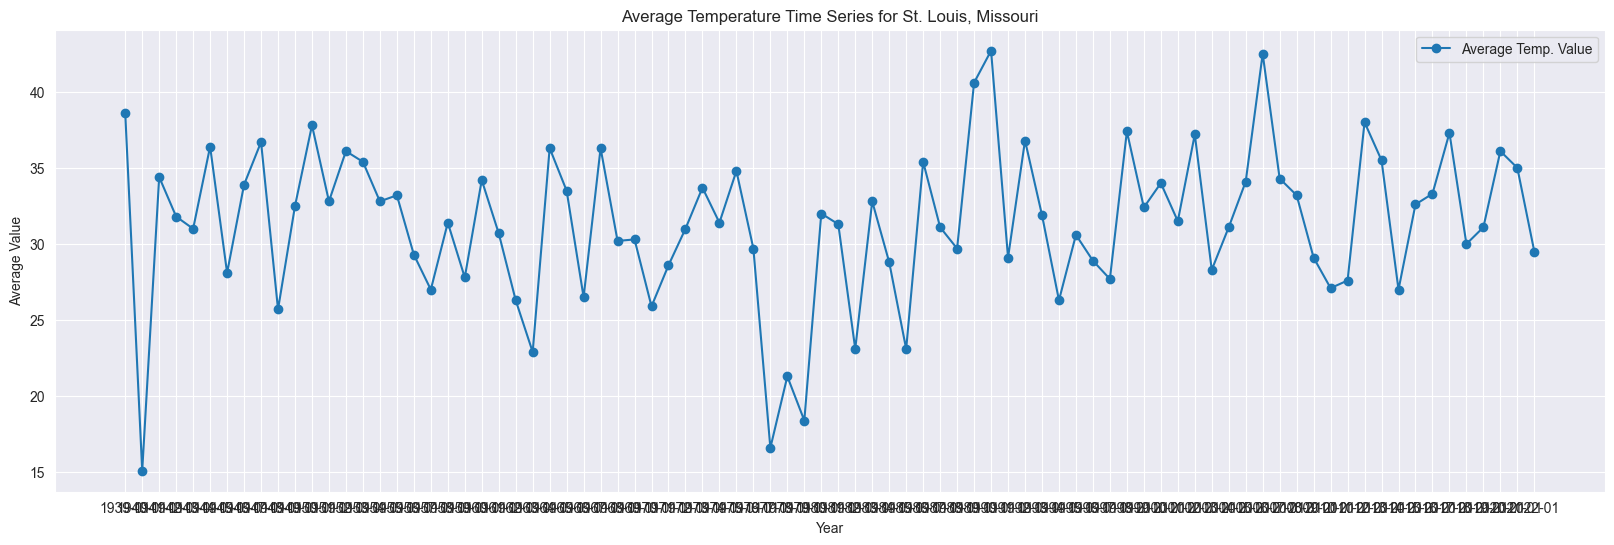

In [5]:
import matplotlib.pyplot as plt

fig = plt.subplots(figsize= (20,6))
plt.plot(temp_df.index ,temp_df["Value"], marker='o', label="Average Temp. Value")

plt.title('Average Temperature Time Series for St. Louis, Missouri')
plt.ylabel('Average Value')
plt.xlabel('Year') 

plt.legend()
plt.grid(True)
plt.show()


Plot the average temperature histogram.

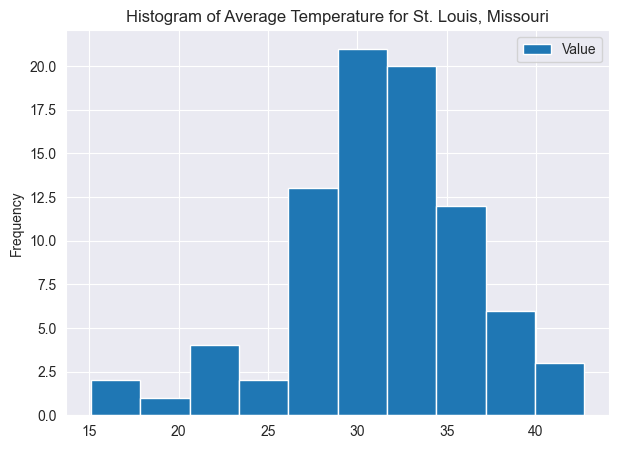

In [6]:
fig,axes = plt.subplots(figsize=(7, 5))

temp_df["Value"].plot(kind='hist', bins=10, title='Histogram of Average Temperature for St. Louis, Missouri')
plt.legend(loc='upper right')
plt.show()

Plot the average temperature kernel density plot.

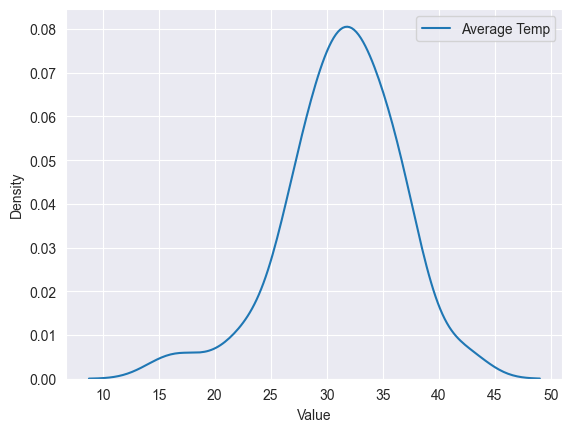

In [7]:
import seaborn as sns

sns.kdeplot(temp_df["Value"], label="Average Temp")
plt.legend(loc='upper right')
plt.show()

Generate descriptive statistics.

In [8]:
print(temp_df.describe())

           Value    Anomaly
count  84.000000  84.000000
mean   31.351190  -0.148810
std     5.118464   5.118464
min    15.100000 -16.400000
25%    28.750000  -2.750000
50%    31.450000  -0.050000
75%    34.500000   3.000000
max    42.700000  11.200000
